<div style="border: 2px solid #ccc; border-radius: 10px; padding: 20px; max-width: 800px; margin: auto; background-color: #1e1e1e;">

  <div style="text-align: center;">
    <img src="../image/acs_coffee_stress_co2_adequate_water_supply_2018.png" 
         alt="ACS Publications of environmental factors and coffee production" 
         style="width: 60%; max-width: 100%; height: auto; border-radius: 8px;">
  </div>

  <blockquote style="margin-top: 20px; font-size: 15px; color: #f0f0f0; font-family: Arial, sans-serif;">
    <p><strong>
      "Evidence is shown suggesting that warming, per se, may be less harmful to coffee suitability than previously estimated, at least under the conditions of an adequate water supply."
    </strong></p>
    <p>— From 
      <a href="https://pubs.acs.org/doi/10.1021/acs.jafc.7b04537" target="_blank" style="color: #4faaff;">
        ACS Publications
      </a>
    </p>
  </blockquote>

</div>


# Explore Weather

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [1]:
# Import necessary libraries
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations 

import seaborn as sns # for data visualization 
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as xticks # for axis formatting
import plotly.express as px # for interactive plots
import math # for mathematical operations not found in numpy or native python...

In [2]:
# import data using pandas as pd
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")


In [3]:
# TODO: concatenate your data files together and save to a new csv file ("../data/weather/weather_concat.csv")
weather = pd.concat([weather1, weather2], ignore_index=True)
weather.to_csv("../data/weather/weather_data.csv", index=False)


In [5]:
weather = pd.read_csv("../data/weather/weather_data.csv")

In [6]:
# TODO: view first 5 rows of your data
weather .head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [7]:
# TODO: describe your numeric columns
weather.describe()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,3.175087,21.285831,28.198312,16.458525,96.502990,48.528039,8.469412,1.286295
std,5.338539,1.190658,0.549483,0.564714,0.891070,2.345644,3.010135,0.611327,0.399773
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202
25%,2010.250000,2.342250,20.975602,27.811486,16.041470,96.079483,47.154325,7.906319,0.911424
50%,2014.500000,2.978022,21.126061,28.406027,16.319722,97.089241,48.450172,8.489286,1.216155
75%,2018.750000,3.718815,21.434377,28.614973,16.459066,97.553044,49.310440,8.946889,1.539160
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207


### Observations and Questions gained from descriptive/summary statistics:

**Observations**
- rain_max:
  - Ranges from 1.62 to 6.67 units (assumed mm/day?).
  - Mean is 3.18; fairly right-skewed due to the max value.
- Temperature:
  - temp_avg is very stable across years (mean ≈ 21.3°C, std ≈ 0.55°C).
  - temp_max and temp_min also show low variability, suggesting consistent climate range.
- Humidity:
  - hum_max values are consistently high (mean ≈ 96.5%, min ≈ 87.8%) — perhaps due to tropical/subtropical conditions.
  - hum_min shows greater variability (std ≈ 3.01), indicating fluctuation in dry periods or between seasons.
- Wind:
  - wind_max is fairly tight (std ≈ 0.61), but wind_avg varies more (std ≈ 0.40), ranging from 0.81 to 2.08.
  - This might indicate localized daily fluctuations or measurement sensitivity.

**Questions**
- Is the low std in temperature a sign of a stable growing season, or does it reflect limited regional coverage?
- How often do extreme rainfall events occur (e.g., above 6 mm)?
- Could hum_min values below 45% impact crop stress or evaporation?
- Does the slight upward trend in wind_avg (based on max = 2.08 vs mean = 1.28) indicate a long-term climatic shift?

Additional Notes: 
- Maybe using boxplot() with multiple subdivisions should help visualize skewness, outliers, and median ordering/position more clearly.
- Plotting year vs each variable/column to check for trends or visible shifts over time.

**Resources:**


In [8]:
# TODO: display the null values in your dataframe
weather.isnull().sum()

year           0
rain_max       0
temp_avg       0
temp_max       0
temp_min       0
hum_max        0
hum_min        0
wind_max       0
wind_avg       0
subdivision    0
dtype: int64

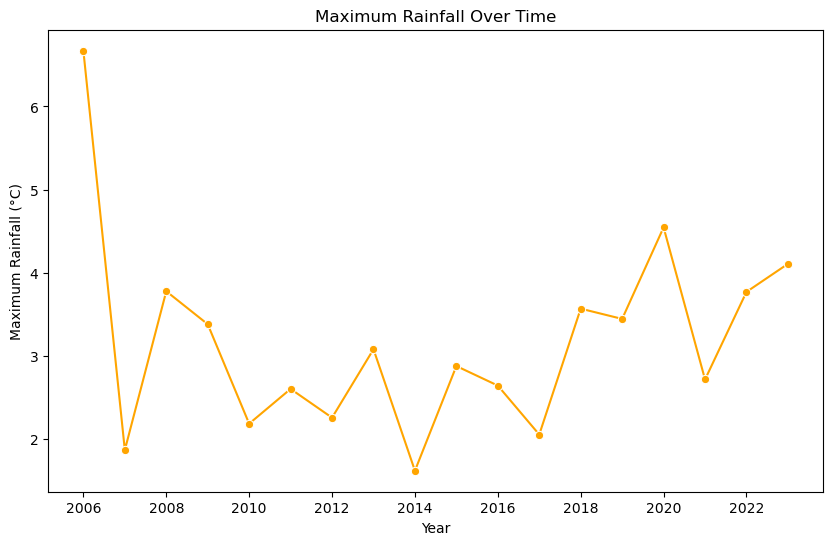

In [ ]:
# TODO: BEGIN YOUR EDA!
# Average temparature over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="rain_max", marker="o", color="orange")
plt.title("Maximum Rainfall Over Time")
plt.xlabel("Year")
plt.ylabel("Maximum Rainfall (°C)")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))

### Observations and Questions gained from line plot of Maximum Rainfall Over Time:

**Observations**
- The highest spike in rainfall occurred in 2006, with over 6.6 units — a clear outlier.
- From 2007–2017, rainfall fluctuates but overall stays below 4 mm with minor peaks.
- A noticeable increase occurs post-2017--especially in 2020--followed by another rise in 2023.
- This suggests two mini-trends:
  - A decline and stabilization phase from 2006–2017
  - A possible resurgence or increased variability from 2018–2023

**Questions**
- What caused the extreme event in 2006? Was it regional, seasonal, or an error?
- Is the increase since 2018 linked to climate variability or maybe changing data collection practices?
- Do years with increased rainfall also show changes in humidity, crop yields, or temperature drops?

Additional Notes: 
- The plot could benefit from either a moving average overlay or a trendline to smooth fluctuations, or both!.
- Annotate plots to mark anomalies like the 2006 spike for storytelling or reporting purposes.

**Resources:**

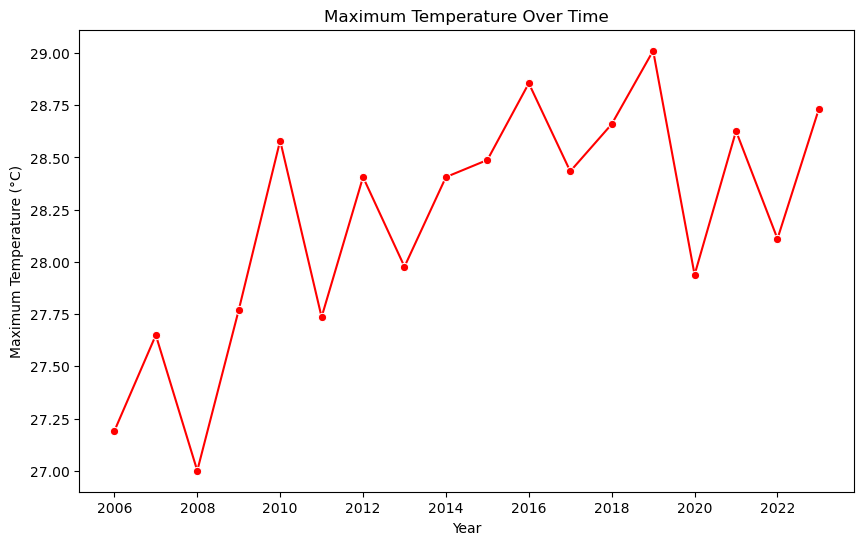

In [ ]:
# Average temparature over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="temp_max", marker="o", color="red")
plt.title("Maximum Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Maximum Temperature (°C)")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))

### Observations and Questions gained from line plot of Maximum Temperature Over Time:

**Observations**
- There’s a general upward trend in maximum temperature from 2006 to ~2019, peaking around 2020.
- The maximum temperature hits above **29°C** in 2020, making it the hottest point in the dataset.
- Despite small year-to-year dips, the overall trajectory appears to be rising, especially between 2008 and 2020.
- Post-2020, there's a notable drop in 2021, but the temperature rebounds again by 2023.
- The values oscillate, but the baseline/floor keeps rising, which is normally considered a signal of climate warming.

**Questions**
- Is the 2020 peak part of a broader heatwave pattern or a climate anomaly?
- Are other weather variables, such as humidity and rainfall, also extreme in 2020 or correlated with this spike?
- Could this upward trend impact crop yield, water demand, or planting/harvest timing in the region??

**Additional Notes:**
- Adding a trendline or regression line could help visualize the rate of increase.
- Overlaying moving average or rolling mean would smooth the noise and better reflect climate behavior.

**Resources:**

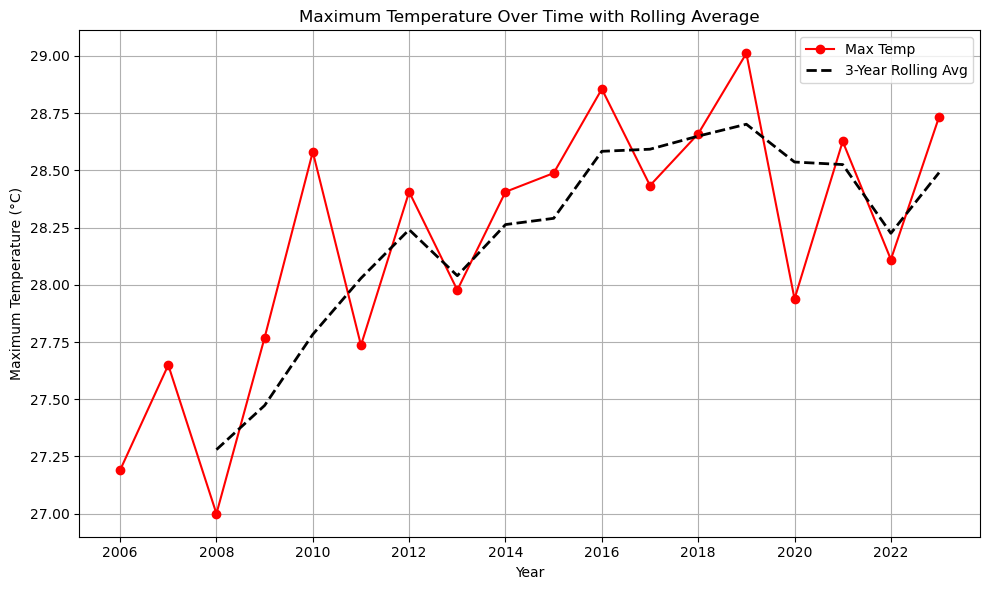

In [50]:
# Make sure your data is sorted by year
weather = weather.sort_values(by='year')

# Set the window size (e.g., 3-year moving average)
rolling_window = 3
weather['temp_max_rolling'] = weather['temp_max'].rolling(window=rolling_window).mean()

# Plot both original and rolling line
plt.figure(figsize=(10, 6))

# Original data (noisy)
plt.plot(weather['year'], weather['temp_max'], label='Max Temp', color='red', marker='o', linestyle='-')

# Smoothed line (moving average)
plt.plot(weather['year'], weather['temp_max_rolling'], label=f'{rolling_window}-Year Rolling Avg', 
         color='black', linestyle='--', linewidth=2)

# Labels and legend
plt.title('Maximum Temperature Over Time with Rolling Average')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature (°C)')
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations and Questions gained from line plot of Maximum Temperature Over Time with Rolling Average:

**Observations**
- The 3-year rolling average smooths out spiky annual fluctuations, revealing gradual warming trend.
- From 2006 to ~2017, there's a clear upward trend, with the rolling average steadily increasing.
- The spike in 2020--above 29°C--shows up clearly, but the rolling average cushions it, reflecting its short-term volatility.
- Although there’s a drop in 2021, the rolling average remains high, indicating that recent years have been consistently warmer than earlier years.
- The curve flattens slightly in the 2021–2023 year range.

**Questions**
- Is this rising trend in maximunm temperature also reflected in minimum temperature or average humidity over time?
- Could this flattening at the end be an anomaly, or does it points to climate stabilization in the region?!
- What might be the drivers of the 2020 temperature spike--maybe global climate events like El Niño?
- Should crops or ecosystems in this region be adapted for increased heat stress going forward?

Additional Notes: 
- Rolling averages help isolate climate signal from weather noise--espcially dealing with granular time range(s).
- I'll try to compare multiple rolling averages--3-year vs 5-year--to better visualize trend sensitive shifts.
- I'll try to layer humidity or rainfall rolling means on a subplot for climate interaction analysis...



**Resources:**

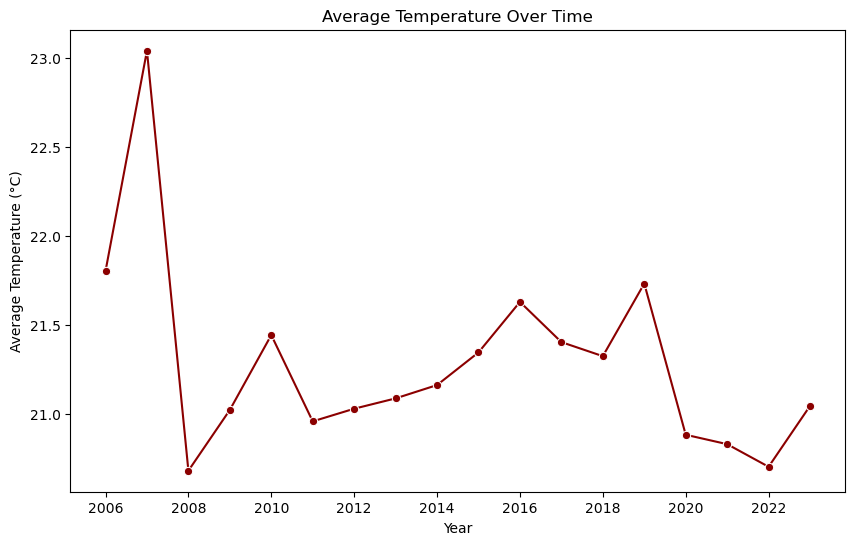

In [ ]:
# Average temparature over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="temp_avg", marker="o", color="darkred")
plt.title("Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))

### Observations and Questions gained from line plot of Average Temperature Over Time:

**Observations**
- There seem to be a spike in avearge temperatures of ~22 to ~23°C between years 2006 through 2007.
- Average temperatures seems steady between ~20 and ~21.3°C for years 2009 to 2015 and again from 2017 to 2018.
- There are spikes/peaks in average temperature for the years 2007, 2010, 2016, and 2019.
- There are also low average temperatures in 2008, 2011, 2021 to 22. 

**Questions**
- What is causing this sudden spike that only lasts for about a year?
  - maybe equiptment related (equipment failure, data reading, etc..) or some weather anomaly for this region.
  - I believe this needs furhter investigation to confidently say what's causing this spike.
- What can the observed spikes/peaks in years 2007, 2010, 2016, and 2019 tell me about the onset of leaf rust? 
  - Does this relate to weather conditions, such as humidity, rainfall, and wind speed? 
- Do these low average temperatures relate in any way to leaf rust? 
  - Can a combination of other weather conditions in additon to low tempeartures have a bearing on the production of the disease that is leaf rust?

Additional Notes: 
- According to my research, the observed steady temperatures are great for cofee plant cultivation.
- This could be somethig to keep in mind for leaf rust and coffee-bearing analysis...

**Resources:**



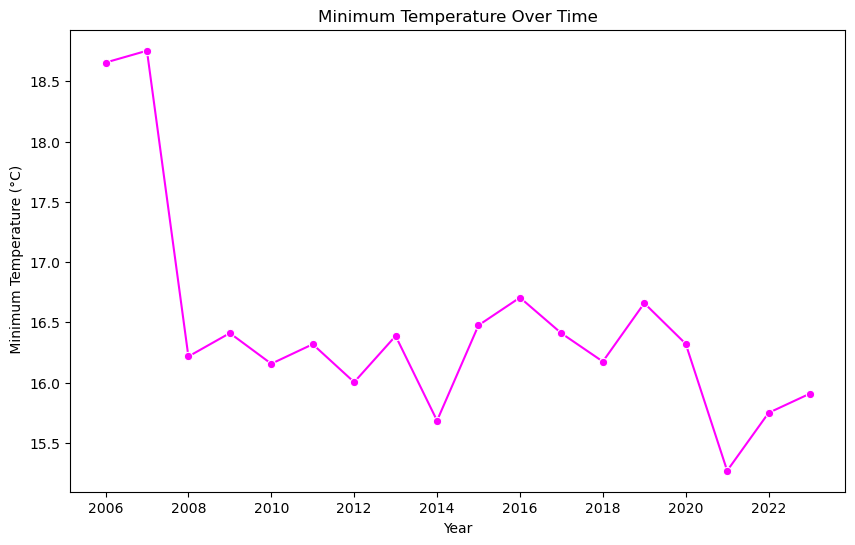

In [ ]:
# Minimum temparature over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="temp_min", marker="o", color="magenta")
plt.title("Minimum Temperature Over Time")
plt.xlabel("Year")
plt.ylabel(" Minimum Temperature (°C)")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))

### Observations and Questions gained from line plot of Minimum Temperature Over Time:

**Observations**
- According to the line plot, there is a higher than normal minimum temperature of ~18.6°C in 2006 and ~18.8°C in 2007, but temperatures drastically drop to ~16°C in 2008.
- After 2008, the minimum temperature appears to fluctuate more moderately, hovering between 15.3°C and 16.8°C through 2023.
- A notable dip appears again in 2021, where the temperature drops to its lowest (~15.3°C) in the entire time series.
- From 2021 onward, there's a gradual recovery in minimum temperature values.
- The trend line clearly shows a downward slope, showing a change in change in minimum temperature over time.

**Questions**
- What environmental or meteorological factors caused the sharp decline from 2007 to 2008?
- Was there a climate anomaly or unusual weather pattern in 2021 that led to the lowest recorded minimum temperature?
- Could extreme changes in minimum temperatures affect coffee plant resilience or increase vulnerability to leaf rust outbreaks?

Additional Notes: 
- The sudden temperature drop in 2008 aligns with global records of La Niña weather patterns that may influence South American climate shifts.
- The overall trend seems relatively stable after the 2008 drop, but subtle dips and rebounds suggest cyclical behavior worth modeling statistically.
- These patterns may need to be cross-referenced with humidity, rainfall, or crop yield data to draw conclusions about their effects on coffee cultivation.

**Resources:**

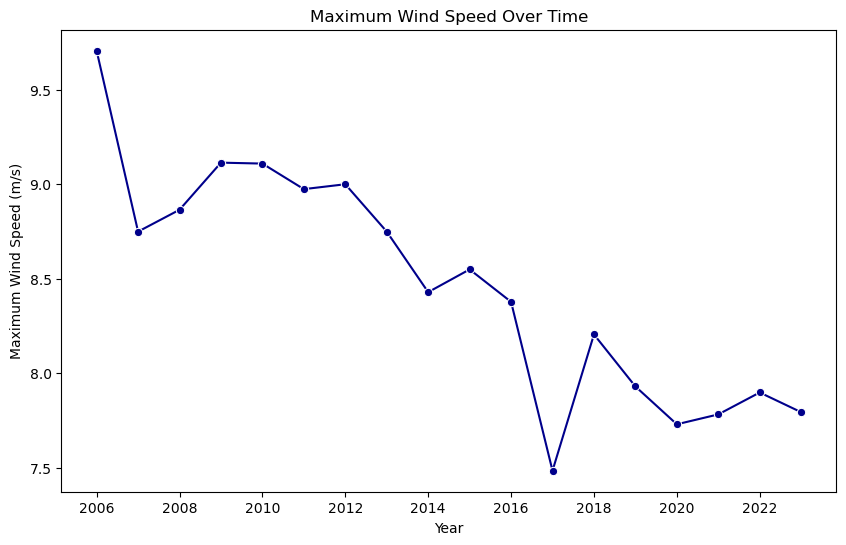

In [ ]:
# Maximum Wind Speed over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="wind_max", marker='o', color="darkblue")
plt.title("Maximum Wind Speed Over Time")
plt.xlabel("Year")
plt.ylabel("Maximum Wind Speed (m/s)")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))

### Observations and Questions gained from line plot of Maximum Wind Speed Over Time:

**Observations**
- There is a clear long-term downward trend in maximum wind speeds from 2006 to 2023.
- The highest wind speed, ~9.7 m/s, occurred in 2006 and the lowest dip was in 2017 at ~7.5 m/s.
- From 2006–2012, wind speeds remained relatively stable with minor fluctuations.
- A more consistent decline begins around 2013, with smaller variations afterward.
- Since ~2018, wind speeds have hovered around a low plateau, rarely rising above 8.0 m/s.

**Questions**
- What’s driving this decrease in wind intensity — could it be related to regional pressure systems, vegetation changes, or urban development?
- Is there a relationship between this wind speed drop and rising temperatures or reduced rainfall?
- Could measurement methods or sensor placements have changed over time?
- How might this decrease in wind affect pollination, evaporation, or air quality in agricultural settings?

**Additional Notes:**
- Consider overlaying a rolling average line to better visualize the trend direction.
- Plot alongside humidity or temperature trends to explore possible inverse relationships.
- You might explore wind direction too, if available, as a declining max speed doesn't always mean less wind activity.

**Resources:**

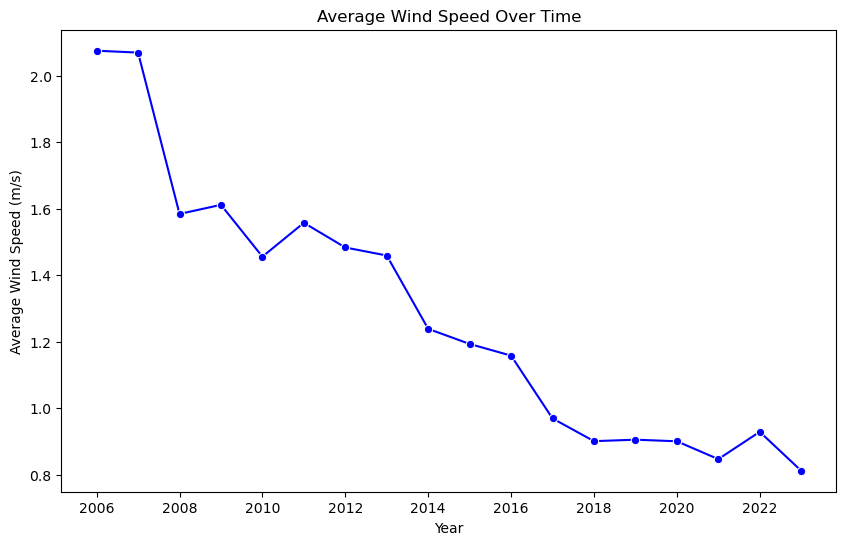

In [ ]:
# Average wind speed over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="wind_avg", marker='o', color="blue")
plt.title("Average Wind Speed Over Time")
plt.xlabel("Year")
plt.ylabel("Average Wind Speed (m/s)")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))

### Observations and Questions gained from line plot of Average Wind Speed Over Time:

**Observations**
- There’s a steady decline in average wind speed from 2006 to 2023.
- The highest average wind speeds were recorded in 2006–2007 at ~2.1 m/s.
- A sharp drop-off begins in 2008, followed by a gradual but consistent decline over time.
- By 2023, average wind speed is just above 0.8 m/s, nearly 60% lower than in 2006.
- This aligns with the downward trend seen in maximum wind speed, strengthening the evidence of reduced wind activity over time.

**Questions**
- Is this decline due to climate-driven weakening of pressure gradients, or could urbanization/land-use changes be a local factor?
- Are there any corresponding trends in temperature or humidity that might help explain reduced air movement?
- Could reduced wind speed affect flower pollination, air quality levels, or even crop evaporation rates?

**Additional Notes:**
- This steady trend could have significant ecological and agricultural implications — especially for systems that rely on wind for natural ventilation and or seed dispersal.
- I may add a rolling average line for a clearer look at these trends.
- Not possible in this data set, but I'd be curious to know the comparison between wind speed and elevation or station metadata, if available. Maybe I'd be able to to rule out measurement drifts, etc... 

**Resources:**

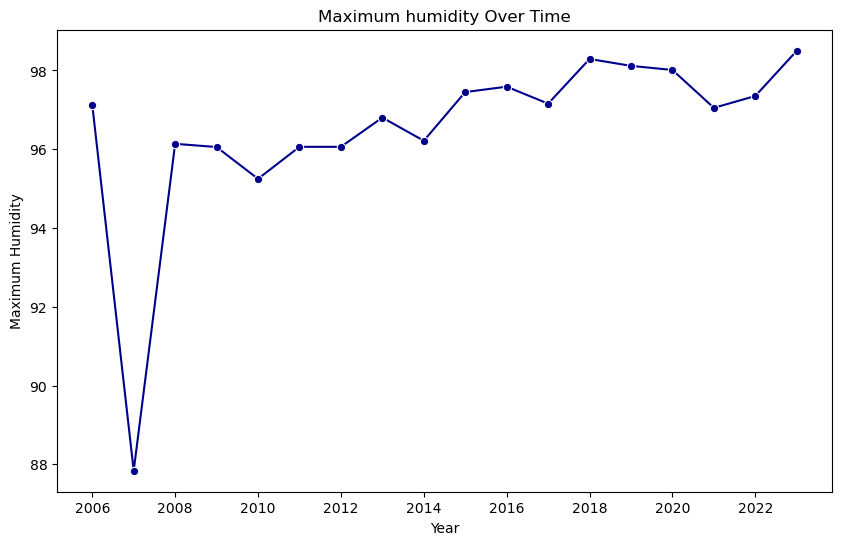

In [ ]:
# Maximum Humidity over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="hum_max", marker='o', color="darkblue")
plt.title("Maximum humidity Over Time")
plt.xlabel("Year")
plt.ylabel("Maximum Humidity")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))

### Observations and Questions gained from line plot of Maximum Humidity Over Time:

**Observations**
- In 2007, maximum humidity fell to a low of ~88%, which stands out as a clear outlier compared to other years.
- 2006 and 2008 show much higher humidity values (~97% and ~96%, respectively), indicating that the 2007 dip was abrupt and not part of a gradual trend.
- From 2008 onward, maximum humidity remained consistently high, mostly between 96% and 98.5%, with only minor year-to-year fluctuations.
- In the final years of the time series (2020–2023), there is a slight upward pattern, with 2023 showing the highest maximum humidity (~98.6%) in the dataset.
- Overall, maximum humidity demonstrates a remarkably stable ceiling, implying that the region rarely experiences extremely dry atmospheric conditions.

**Questions**
- What environmental or atmospheric anomaly occurred in 2007 to cause such a sharp drop in max humidity?
- Is there a relationship between this 2007 humidity dip and other variables like rainfall, temperature, or coffee yield?
- Could this sustained high humidity (~96–98%) after 2008 be contributing to leaf rust outbreaks, given that high humidity is ideal for fungal growth?
- How does this max humidity trend interact with daily or monthly rainfall patterns in the region?
Additional Notes: 

Additional Notes:
- High maximum humidity is an important risk factor for the sporulation of Hemileia vastatrix (coffee leaf rust), especially when paired with rain or dew.
- This consistency might mean that seasonal variation (not yearly averages) holds more influence over coffee disease cycles.
- A future step could involve calculating monthly max humidity or integrating humidity + rain events to simulate infection windows.

**Resources:**

Change in max humidity per year: -0.20% per year


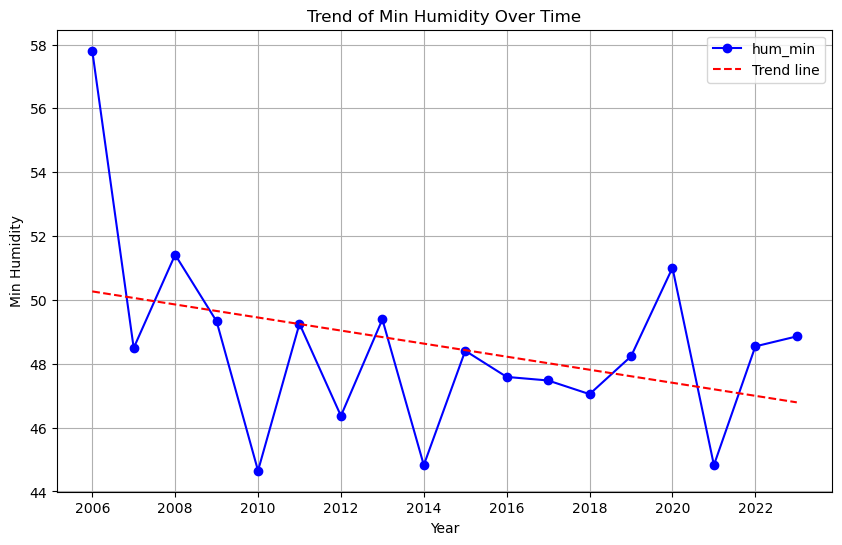

In [ ]:
# Minimum temparature over time.
# Example: Trend of change in hum_max
x = weather['year']
y = weather['hum_min']

# Fit a line using 1st-degree polynomial form.
slope, intercept = np.polyfit(x, y, 1)
print(f"Change in max humidity per year: {slope:.2f}% per year")

# Plot the data and the trend line.
plt.figure(figsize=(10, 6))
#sns.lineplot(data=weather, x="year", y="temp_min", marker="o", color="magenta")
plt.plot(x, y, 'bo-', label='hum_min')
plt.plot(x, slope * x + intercept, 'r--', label='Trend line')
plt.xlabel("Year")
plt.ylabel("Min Humidity")
plt.title("Trend of Min Humidity Over Time")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))
plt.legend()
plt.grid(True)
plt.show()



### Observations and Questions gained from line plot of Minimum Humidity Over Time:

**Observations**
- Minimum humidity starts very high at ~57.8% in 2006, then drops sharply to ~48.5% in 2007.
- Over the years, humidity levels fluctuate with some minor peaks in 2008, 2013, 2020, but the overall trend is downward.
- The trend line confirms a steady decline in minimum humidity of approximately 0.2% per year.
- This downward trend in humidity could contribute to increased environmental stress for coffee crops, especially in dry seasons.

**Questions**
- What long-term climatic shifts or local agricultural practices may be contributing to declining minimum humidity levels?
- Could decreasing humidity levels increase the risk of leaf rust outbreaks, which thrive in moist conditions, especially after dry spells?
- How do these changes in humidity interact with temperature and rainfall trends to affect coffee quality and yield?

Additional Notes: 
- Consistent decline in humidity, albeit subtle, may signal desiccation stress on crops or changes in seasonal water availability.

**Resources:**

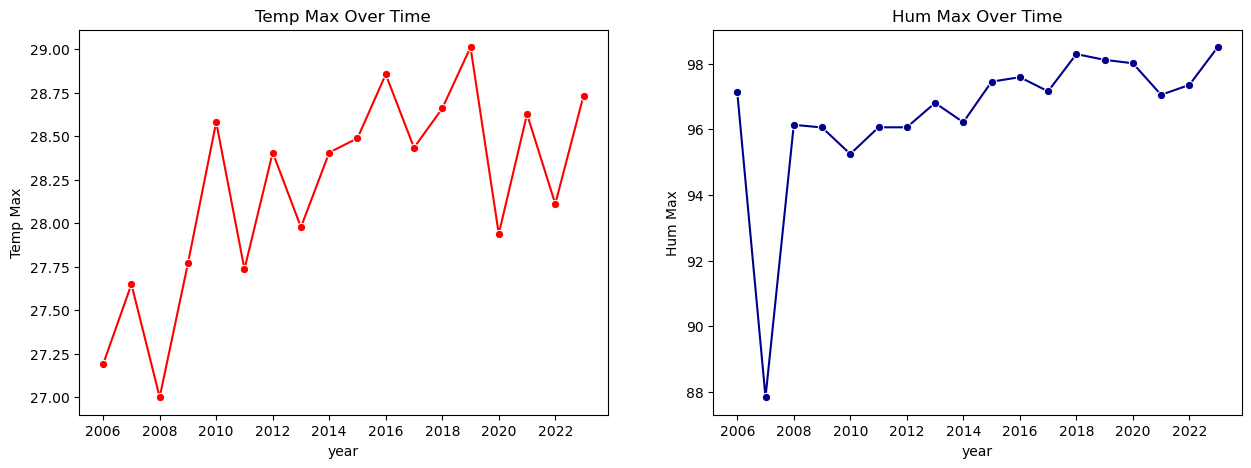

In [ ]:
# Maximum tempearture and humidity over time.  
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True)

columns_to_plot = ['temp_max', 'hum_max']
for i, column in enumerate(columns_to_plot):
    sns.lineplot(x='year', y=column, data=weather, ax=axs[i], marker='o', color="red" if column == 'temp_max' else "darkblue")
    axs[i].set_title(f"{column.replace('_', ' ').title()} Over Time")
    axs[i].set_ylabel(column.replace('_', ' ').title())
    axs[i].tick_params(labelbottom=True)
    
# Ensure all subplots show x-axis year labels
for ax in axs:
    ax.tick_params(labelbottom=True)
    ax.xaxis.set_major_locator(xticks.MultipleLocator(2))


<Axes: >

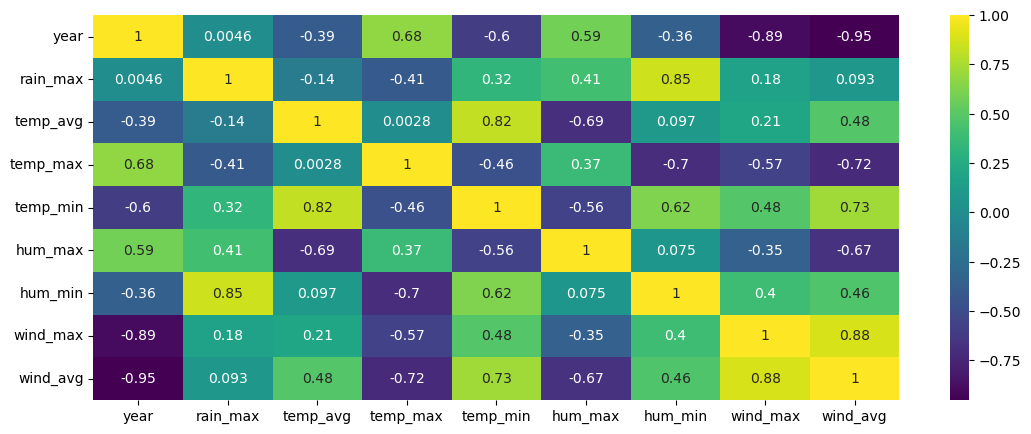

In [ ]:
# Finding the relationshipt between all variables in the weather dataset--with the exception of subdivision column.
plt.figure(figsize=(13, 5))
num_weather = weather.select_dtypes(include='number') 
corr = num_weather.corr()
sns.heatmap(corr, annot=True, cmap='viridis')

### Observations and Questions gained from Heat Map of Correlation weather Dataset Over Time:

**Observations**
- temp_avg is highly positively correlated with temp_min (0.82) and moderately with temp_max.
- wind_max and wind_avg show very high correlation (0.88) — may indicate redundancy.
- wind_avg and year are strongly negatively correlated (-0.95) — possibly due to climate shifts or instrumentation changes over time.
- hum_min and rain_max have a high correlation (0.85) — may hint at regional weather behavior or seasonal moisture trends.
- Strong inverse relationship between temp_max and both hum_max and hum_min.

**Questions**
- Why is wind_avg decreasing so much over time (year)? Could this be a measurement artifact or a real climatic trend?
- Do certain months or regions drive the high correlation between rain_max and hum_min?
- Are both wind_max and wind_avg needed as features? Or is one redundant?
- Could temp_avg be replaced entirely by temp_min and temp_max?

**Additional Notes:**
- Some features show stronger correlations than others. 
- I'm excited to get into phase-2 where I might get a chance to learn feature selection techniques and AI/ML tasks!


**Resources:**

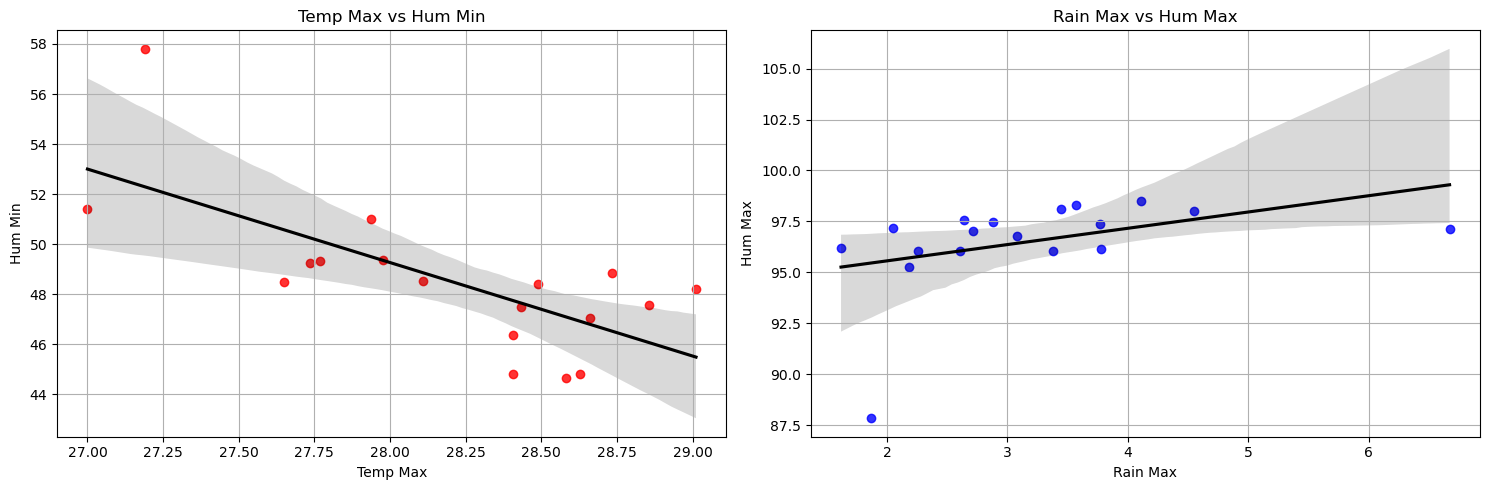

In [ ]:
# Define the X vs Y pairs for the two scatterplots
plot_pairs = [
    ('temp_max', 'hum_min'),
    ('rain_max', 'hum_max'),
    
]
colors = ['red', 'blue']

# Create side-by-side subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through the pairs to plot
for i, (x_col, y_col) in enumerate(plot_pairs):
    sns.regplot(x=x_col, y=y_col, data=weather, ax=axs[i], scatter_kws={'color': colors[i]}, line_kws={'color': 'black'})
        
    axs[i].set_title(f"{x_col.replace('_', ' ').title()} vs {y_col.replace('_', ' ').title()}")
    axs[i].set_xlabel(x_col.replace('_', ' ').title())
    axs[i].set_ylabel(y_col.replace('_', ' ').title())
    axs[i].grid(True)

plt.tight_layout()
plt.show()



In [19]:
# Pearson's correlation coefficient
# Calculate the correlation between max-temperature and min-humidity
temp_hum_corr = pearsonr(weather['temp_max'], weather['hum_min'])
print(f"Pearson's r: {temp_hum_corr[0]:.2f} and p-value: {temp_hum_corr[1]:.2e}")
# Calculate the correlation between max-rainfall and max-humidity
rain_hum_corr = pearsonr(weather['rain_max'], weather['hum_max'])
print(f"Pearson's r: {rain_hum_corr[0]:.2f} and p-value: {rain_hum_corr[1]:.2e}")


Pearson's r: -0.70 and p-value: 1.20e-03
Pearson's r: 0.41 and p-value: 9.48e-02


### Observations and Questions gained from Calculating Pearson correlation Coefficient between max-temperature and min-humidity, as well as between Maximum Rainfall and Maximum Humidity:

**Observations**
- Temp Max vs. Hum Min:
  - There is a strong negative correlation: r = -0.70, p = 0.0012.
  - This suggests a statistically significant relationship: as maximum temperature increases, minimum humidity decreases.
  - Visual confirms this inverse relationship, with a well-fitted regression line and tight confidence interval.

- Rain Max vs. Hum Max:
  - Moderate positive correlation: r = 0.41, p = 0.0948
  - Not statistically significant at α = 0.05, though a slight upward trend is visible, it's not strong enough to conclude a dependable relationship at this point.

**Questions**
- Could the inverse relationship between max temp and min humidity influence evapotranspiration rates?
- Would monthly averaging or rolling windows reveal a stronger or different pattern?
- Do regional or elevation-based subdivisions explain variation in the strength of the relationships?

Additional Notes: 
- A statistically significant negative correlation between temp_max and hum_min may impact soil moisture retention...
- While rain_max and hum_max are positively correlated, the weak significance hints at possible external factors influencing humidity beyond rainfall--wind, temperature, etc...

**Resources:**

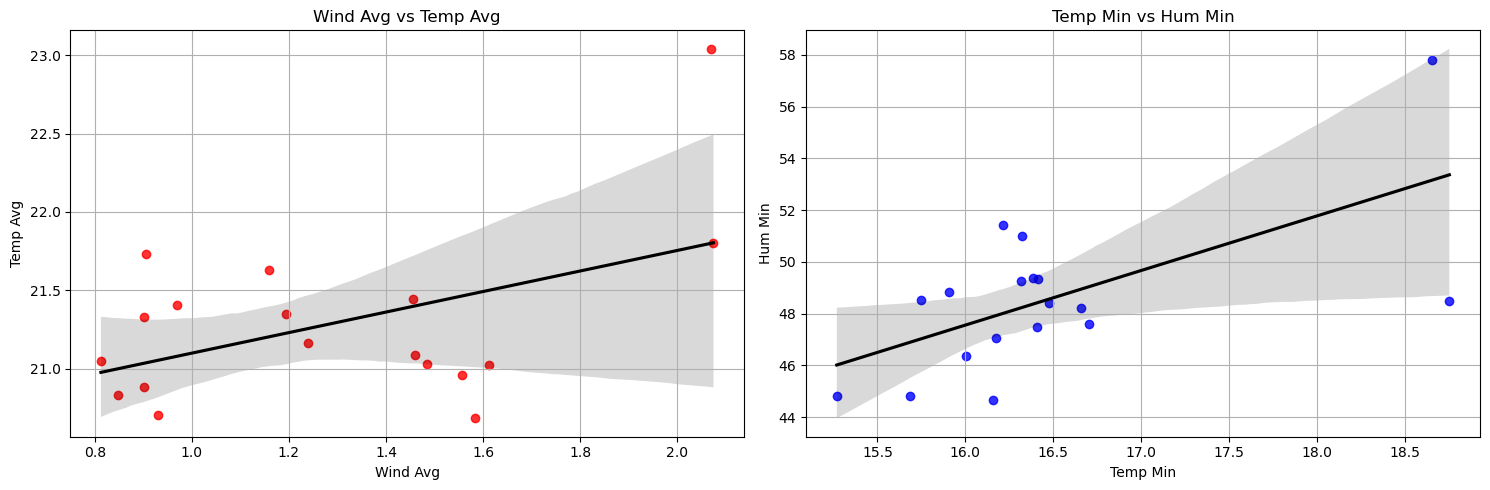

In [20]:
# Define the X vs Y pairs for the two scatterplots
plot_pairs = [
    ('wind_avg', 'temp_avg'),
    ('temp_min', 'hum_min')
]
colors = ['red', 'blue']

# Create side-by-side subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through the pairs to plot
for i, (x_col, y_col) in enumerate(plot_pairs):
    sns.regplot(x=x_col, y=y_col, data=weather, ax=axs[i], scatter_kws={'color': colors[i]}, line_kws={'color': 'black'})
        
    axs[i].set_title(f"{x_col.replace('_', ' ').title()} vs {y_col.replace('_', ' ').title()}")
    axs[i].set_xlabel(x_col.replace('_', ' ').title())
    axs[i].set_ylabel(y_col.replace('_', ' ').title())
    axs[i].grid(True)

plt.tight_layout()
plt.show()



In [21]:
# Pearson's correlation coefficient.
# Calculate the correlation between Average Wind and Average Temperature.
temp_avg_wind_avg_corr = pearsonr(weather['wind_avg'], weather['temp_avg'])
print(f"Pearson's r: {temp_avg_wind_avg_corr[0]:.2f} and p-value: {temp_avg_wind_avg_corr[1]:.2e}")
# Calculate the correlation between max-rainfall and max-humidity
temp_avg_hum_min_corr = pearsonr(weather['temp_min'], weather['hum_min'])
print(f"Pearson's r: {temp_avg_hum_min_corr[0]:.2f} and p-value: {temp_avg_hum_min_corr[1]:.2e}")


Pearson's r: 0.48 and p-value: 4.56e-02
Pearson's r: 0.62 and p-value: 5.59e-03


### Observations and Questions gained from Calculating Pearson correlation Coefficient between Average Temperature and Average Wind Speed, as well as between Minimum Temperature and Minimum Humidity:

**Observations**
- Average Temperature vs. Average Wind Speed
  - Pearson’s r = 0.48, p = 0.0456 → Moderate positive correlation, statistically significant at α = 0.05.
  - Suggests that higher temperatures tend to occur with slightly higher average wind speeds.
  - Might imply a relationship where warmer conditions coincide with stronger air movement (perhaps convection-related).
- Min Temperature vs. Min Humidity
  - Pearson’s r = 0.62, p = 0.0056 → Strong positive correlation, statistically significant.
  - Maybe on warmer nights--higher temp_min--minimum humidity levels also tend to be higher.
  - Could be related to reduced nighttime cooling or regional humidity retention.
  - Both line plots--temp and humidity over time--seem to fluctuate in tandem, especially in recent years.

**Questions**
- Does this visible fluctuation in recent years be a result of climate change?
- How does elevation, latitude, or land use impact these correlations?

Additional Notes: 
- These findings may suggest that minimum values (temp/humidity) are more sensitive to long-term climate shifts than maximums.

**Resources:**

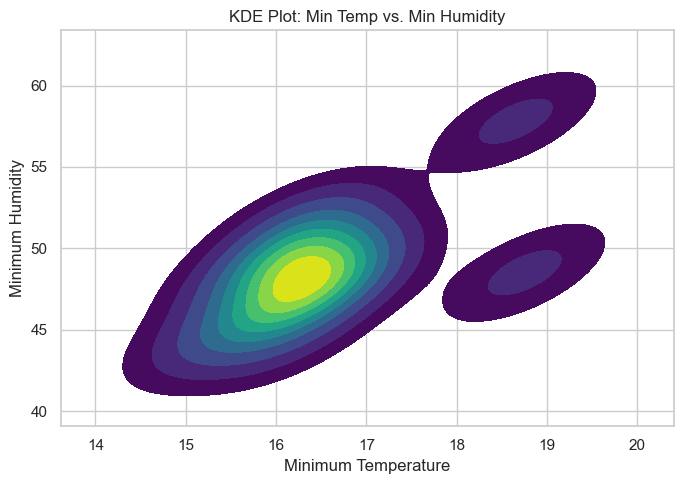

In [79]:
# KDE Plot for Average Wind and Average Temperature
plt.figure(figsize=(7, 5))
sns.kdeplot(data=weather, x='temp_min', y='hum_min', fill=True, cmap='viridis')
plt.title("KDE Plot: Min Temp vs. Min Humidity")
plt.xlabel("Minimum Temperature")
plt.ylabel("Minimum Humidity")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations and Questions gained from KDE Plot of Minimum Tempearture and Minimum Humidity:

**Observations**
- The KDE plot reveals a dense, elliptical-like cluster centered around ~16°C and ~48% humidity. This indicates a common environmental state where both min temp and min humidity frequently co-occur.
- There are secondary contour lobes near, (18°C, 56%) and (19°C, 45%), indicating localized high-density subpopulations/outliers that deviate from the main pattern.
- The orientation of the contours suggests a moderate positive relationship: as minimum temperatures rise, minimum humidity also tends to increase, which aligns with Pearson’s r ≈ 0.62 finding above, statistically significant relationship.

**Questions**
- Do these secondary clusters reflect specific weather events or geographic anomalies?
- Is the central mode (16°C, 48%) typical for a certain season or year? 
- Would it help to apply KDE plots year-by-year?

**Additional Notes:**
- I may try overlaying scatter points or heatmaps to reinforce outlier analysis.

**Resources:**

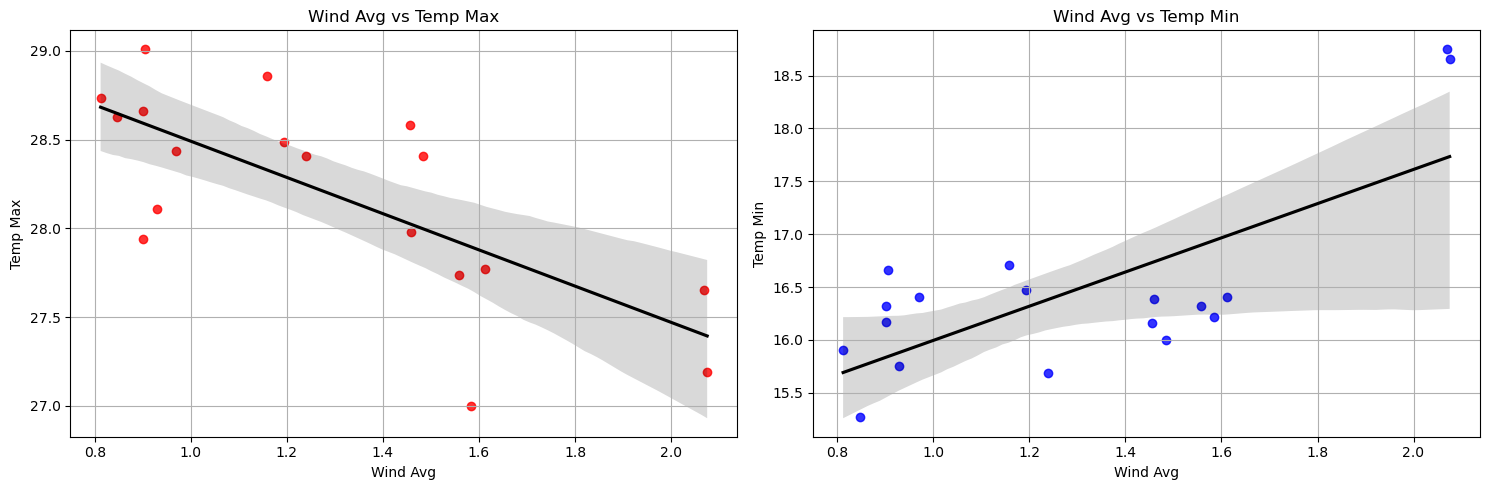

In [22]:
# Define the X vs Y pairs for the two scatterplots
plot_pairs = [
    ('wind_avg', 'temp_max'),
    ('wind_avg', 'temp_min')
]
colors = ['red', 'blue']

# Create side-by-side subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through the pairs to plot
for i, (x_col, y_col) in enumerate(plot_pairs):
    sns.regplot(x=x_col, y=y_col, data=weather, ax=axs[i], scatter_kws={'color': colors[i]}, line_kws={'color': 'black'})
        
    axs[i].set_title(f"{x_col.replace('_', ' ').title()} vs {y_col.replace('_', ' ').title()}")
    axs[i].set_xlabel(x_col.replace('_', ' ').title())
    axs[i].set_ylabel(y_col.replace('_', ' ').title())
    axs[i].grid(True)

plt.tight_layout()
plt.show()



In [23]:
# Pearson's correlation coefficient
# Calculate the correlation between max-temperature and min-humidity
wind_temp_max_corr = pearsonr(weather['wind_avg'], weather['temp_max'])
print(f"Pearson's r: {wind_temp_max_corr[0]:.2f} and p-value: {wind_temp_max_corr[1]:.2e}")
# Calculate the correlation between max-rainfall and max-humidity
wind_temp_min_corr = pearsonr(weather['wind_avg'], weather['temp_min'])
print(f"Pearson's r: {wind_temp_min_corr[0]:.2f} and p-value: {wind_temp_min_corr[1]:.2e}")


Pearson's r: -0.72 and p-value: 7.09e-04
Pearson's r: 0.73 and p-value: 6.57e-04


### Observations and Questions gained from Calculating Pearson correlation Coefficient between Average Wind Speed and Maximum Temperature, as well as between Average Wind Speed and Minimum Temperature:

**Observations**
- Wind Avg vs. Temp Max
  - Pearson’s r = -0.72, p = 0.000709
  - Strong negative correlation, statistically significant.
  - Indicates that as wind speed increases, max temperature tends to decrease.
  - This might suggest cooling effects from stronger wind flow, especially during hot periods.
- Wind Avg vs. Temp Min
  - Pearson’s r = 0.73, p = 0.000657
  - Also statistically significant, strong positive correlation.
  - Suggests higher wind speeds are linked with warmer minimum temperatures.
  - These correlations are in opposite directions, reinforcing the idea that wind modifies temperature ranges.

**Questions**
- Could this pattern reflect tropical maritime influences, where wind moderates temperature extremes?
- Could regional topography or vegetation affect how wind influences day vs. night temperatures?
- Does this inverse relationship affect plant stress, evaporation, or energy needs--heating/cooling?

**Additional Notes:**
- This is might be a good candidate for visual regression plots or scatterplots with hue by season.
- Might consider calculating the diurnal range (temp_max - temp_min) and correlating that with wind_avg.
- These results support the idea that wind acts as a climate regulator, especially in sensitive ecosystems.



**Resources:**

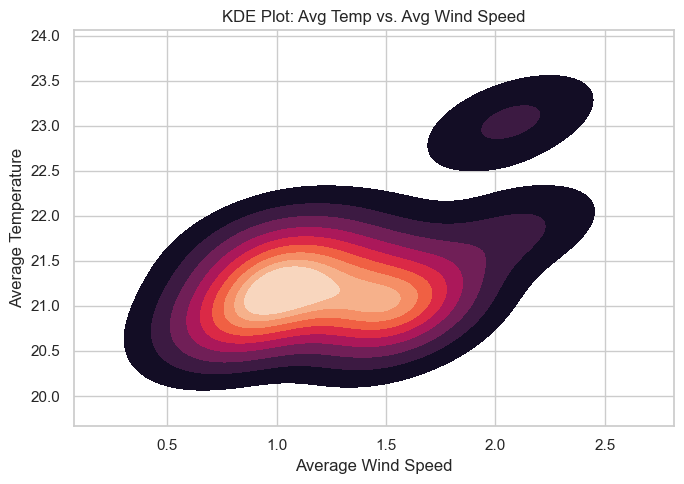

In [72]:
plt.figure(figsize=(7, 5))
sns.kdeplot(data=weather, x='wind_avg', y='temp_avg', fill=True, cmap='rocket')
plt.title("KDE Plot: Avg Temp vs. Avg Wind Speed")
plt.xlabel("Average Wind Speed")
plt.ylabel("Average Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations and Questions gained from KDE Plot of Average Wind Speed and Average Temperature:

**Observations**
- The plot displays a strong concentration of observations around:
  - Avg Wind Speed: ~0.8 to 1.5 m/s
  - Avg Temperature: ~21.0°C to 21.5°C
- This indicates that most of the climatic events cluster in mild conditions with modest wind speed and stable temperatures.
- A secondary lobe or bump appears near:
  - Wind speed: ~2.0–2.5 m/s
  - Temp: ~23°C+
  - Suggesting rare, possibly extreme or anomalous yearr--could possible warrant deeper/special attention.
- The contours imply a moderate positive relationship, which supports earlier Pearson’s r of ~0.48--mild correlation, statistically near α=0.05.

**Questions**
- Are the high-temp, high-wind years associated with specific weather events--heat waves or drought-like events?
- Could seasonality or topography be driving the dual-modal KDE?

**Additional Notes:**
- I may try different bandwidths to attempt smoother or sharper density blobs.

**Resources:**

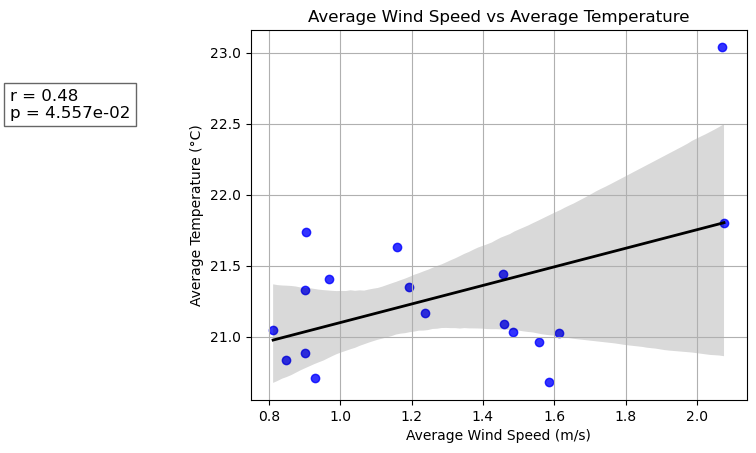

In [ ]:
# Calculate correlation coefficient between axeses and points
r_value, p_value = pearsonr(x=weather['wind_avg'], y=weather['temp_avg'])

# Create scatter-plot
sns.regplot(data=weather, x='wind_avg', y='temp_avg', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})

# Add correlation coefficient to plot
#plt.text(5, 30, 'r = ' + str(round(r, 2)))
plt.text(
    x=weather['wind_avg'].max() - 2,
    y=weather['temp_avg'].max() - 0.5,
    s=f"r = {r_value:.2f}\np = {p_value:.3e}",
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.6)
)
plt.title("Average Wind Speed vs Average Temperature")
plt.xlabel("Average Wind Speed (m/s)") 
plt.ylabel("Average Temperature (°C)")
plt.grid(True) 

In [51]:
# Pearson's correlation coefficient.
# Calculate the correlation between Average Wind and Average Temperature.
temp_avg_wind_avg_corr = pearsonr(weather['wind_avg'], weather['temp_avg'])
print(f"Pearson's r: {temp_avg_wind_avg_corr[0]:.2f} and p-value: {temp_avg_wind_avg_corr[1]:.2e}")

Pearson's r: 0.48 and p-value: 4.56e-02


### Observations and Questions gained from calculating Pearson Correlation Coefficient between Average Winds Speed and Average Tempearture:

**Observations**
- The Pearson correlation coefficient is r = 0.48, indicating a moderate positive relationship.
- The p-value is 0.0456, which is less than α = 0.05, so the result is statistically significant.
- Interpretation: As average wind speed increases, average temperature tends to rise.
- This may suggest that stronger airflow coincides with warmer conditions, possibly due to heat advection (movement of warm air) or surface warming and convection effects.
- The shaded region in the plot exhibits the confidence interval for the regression line, more narrow in the data-dense region, wider in outlier zones.

**Questions**
- Does this relationship hold across different seasons or times of day, or is it concentrated during summer months?
- Could this be due to low-level atmoshperic winds--sea breezes or warm valley breezes?
- How does this trend behave in coastal vs. inland settings??

**Additional Notes:**
- The data distribution shows more clustering around moderate wind and temperature values, with only a few high-wind/high-temp combinations.
- Further exploration could involve rolling average smoothing or splitting by year to examine temporal stability of this trend. 

**Resources:**

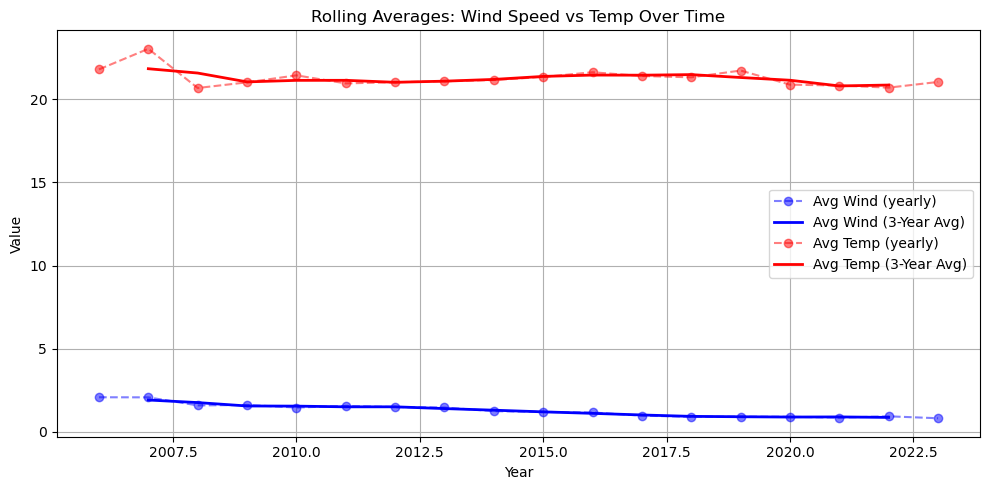

In [ ]:
# Sort by year if not already sorted
weather = weather.sort_values('year')

# Apply 3-year rolling average
weather['wind_avg_roll'] = weather['wind_avg'].rolling(window=3, center=True).mean()
weather['temp_avg_roll'] = weather['temp_avg'].rolling(window=3, center=True).mean()

# Plot smoothed trends
plt.figure(figsize=(10, 5))
plt.plot(weather['year'], weather['wind_avg'], '--o', label='Avg Wind (yearly)', color='blue', alpha=0.5)
plt.plot(weather['year'], weather['wind_avg_roll'], label='Avg Wind (3-Year Avg)', color='blue', linewidth=2)
plt.plot(weather['year'], weather['temp_avg'], '--o', label='Avg Temp (yearly)', color='red', alpha=0.5)
plt.plot(weather['year'], weather['temp_avg_roll'], label='Avg Temp (3-Year Avg)', color='red', linewidth=2)
plt.title("Rolling Averages: Wind Speed vs Temp Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations and Questions gained from Rolling Average Smoothing and Year-to-Year Trend Analysis

**Observations**
- Average Wind Speed--blue:
  - Shows a steady and consistent decline over the 18-year period.
  - The 3-year rolling average--solid blue line--confirms the downward trend, smoothing out short-term fluctuations and clarifying that the decrease is gradual and persistent.
  - This suggests a long-term weakening of wind activity, which could be tied to broader climatic changes or other pressure patterns in the region.
- Average Temperature--red:
  - Remains relatively stable, fluctuating within a narrow range.
  - The red rolling line indicates a somewhat mild downward drift between 2007–2012, followed by a rebound and plateau from 2013 onward.
  - Unlike wind speed, temperature does not display a clear linear trend — more of a wavy behavior that might relate to external factors like local weather shifts, or maybe instrumentation precision.
- The visual divergence between the two smoothed trends implies that wind speed is declining independently of temperature variation--interesting...

**Questions**
- What are the potential drivers behind the consistent drop in average wind speed? Could it be related to:
Urban development or land use changes?
- A weakening pressure gradient in the region?
- Why does temperature remain stable while wind speed drops? Is it possible that the loss of wind is offsetting what would otherwise be a stronger warming trend?
- Would breaking this down by season or quarter reveal more pronounced patterns--are 'winters' cooling while 'summers' warm?

Additional Notes: 
- The rolling average method effectively reduces the noise in the data, helping to highlight long-term trends and eliminate year-to-year weather anomalies.
- A future step could involve exploring wind direction shifts, not just speed, to assess whether prevailing patterns are also changing.

**Resources:**

Pearson's r: -0.84, p-value: 1.37e-05


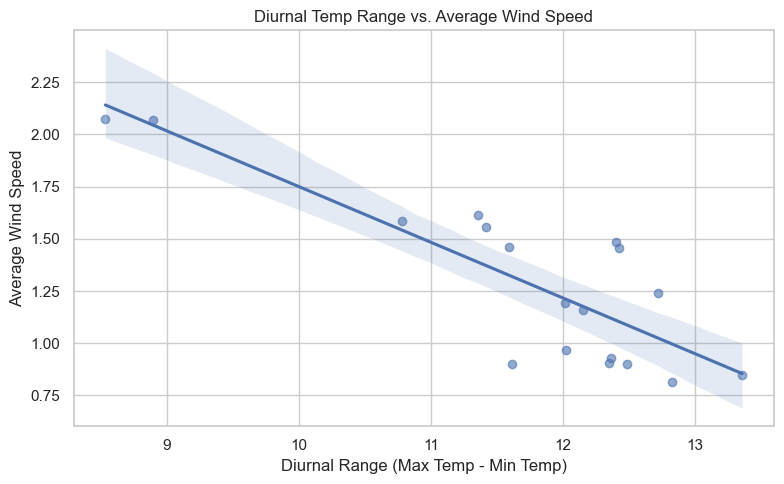

In [68]:
# Create a new column for diurnal tempearture range
weather['diurnal_range'] = weather['temp_max'] - weather['temp_min']

# Calculate Pearson correlation
r_val, p_val = pearsonr(weather['diurnal_range'], weather['wind_avg'])
print(f"Pearson's r: {r_val:.2f}, p-value: {p_val:.2e}")

# Plot scatter with regression line
plt.figure(figsize=(8, 5))
sns.regplot(data=weather, x='diurnal_range', y='wind_avg', scatter_kws={'alpha':0.6})
plt.title("Diurnal Temp Range vs. Average Wind Speed")
plt.xlabel("Diurnal Range (Max Temp - Min Temp)")
plt.ylabel("Average Wind Speed")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations and Questions gained from Pearson Correlation Coefficient between Maximum Diurnal Range and Average Wind Speed:


**Observations**
- According to Pearson correlation coefficient of r = -0.84 and a very low p-value of 1.37e-05, indicating a strong, statistically significant negative correlation.
- This seem to indicate that as the diurnal temperature range (max temp - min temp) increases, the average wind speed tends to decrease significantly.
- Visually, the trendline is steep and best-fitted, reinforcing the strength of this inverse relationship.
- The confidence interval shading shows narrow spread, indicating consistent behavior across the observed data-points.
- This may suggest less atmospheric mixing or wind is allowing for greater daytime heating and nighttime cooling, leading to wider temperature gaps.

**Questions**
- Could declining wind speeds be reducing surface-level heat dispersion, thereby amplifying the day-night temperature range?
- Are there seasonal or geographical effects behind this pattern — for example, is this specific to calm, dry seasons?
- Might this signal early signs of climate pattern shifts, such as weakening pressure gradients or changes in land–atmosphere energy balance?

**Additional Notes:**
- This relationship might be worth exploring in climate modeling or forecasting tools...?
- It aligns with observations in urban heat island studies, where lower wind speeds can drive larger thermal gaps.
Consider comparing these results to other global datasets to test generalizability or regional uniqueness.

**Resources:**

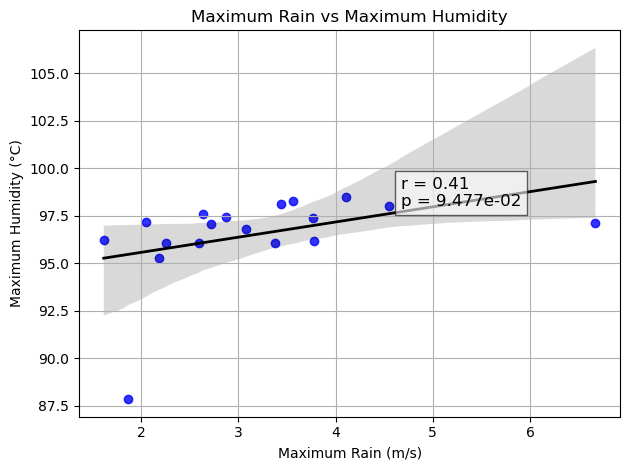

In [54]:
# Calculate correlation coefficient between Maximum Rainfall and Maximum Humidity
r_value, p_value = pearsonr(x=weather['rain_max'], y=weather['hum_max'])

# Create scatterplot
sns.regplot(data=weather, x='rain_max', y='hum_max', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})

# Add correlation coefficient to plot
#plt.text(5, 30, 'r = ' + str(round(r, 2)))
plt.text(
    x=weather['rain_max'].max() - 2,
    y=weather['hum_max'].max() - 0.5,
    s=f"r = {r_value:.2f}\np = {p_value:.3e}",
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.6)
)

plt.title("Maximum Rain vs Maximum Humidity")
plt.xlabel("Maximum Rain (m/s)") 
plt.ylabel("Maximum Humidity (°C)")
plt.tight_layout()
plt.grid(True) 

In [59]:
# Pearson's correlation coefficient.
# Calculate the correlation between Average Wind and Average Temperature.
temp_avg_wind_avg_corr = pearsonr(weather['rain_max'], weather['hum_max'])
print(f"Pearson's r: {temp_avg_wind_avg_corr[0]:.2f} and p-value: {temp_avg_wind_avg_corr[1]:.2e}")

Pearson's r: 0.41 and p-value: 9.48e-02


### Observations and Questions gained from calculating Pearson Correlation Coefficient between Maximum Rainfall and Maximum Humidity:

**Observations**
- The Pearson correlation coefficient is r = 0.41, which suggests a moderate positive relationship.
- The p-value = 0.0948, which is not statistically significant at the common alpha threshold of 0.05.
- Visually, there's a slight upward trend, but the scatterplot shows wide variability, especially at low rainfall values.
- One or two outliers--the point near 87.5% humidity--may be reducing the strength of the relationship.

**Questions**
- Would removing outliers strengthen the correlation and possibly make the result significant?
- Is there a lag effect where rainfall increases humidity the next day or vice-versa?

**Additional Notes:**
- Although the correlation is not statistically significant, it may still be relevance, especially in forecasting localized weather phenomena(s).

**Resources:**

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is average temperature changing across the years for Minas Gerais? Is this increasing or decreasing?

According to the line plot:
- There seem to be a spike in avearge temperatures of ~22 to ~23°C between years 2006 through 2007. 
  - causes for this could possibly stem from weather anomalies, equipment issues, or even human error. Therefore, I've concluded that this needs further study in order to gain deeper insights into underlying cause(s).
- Average temperatures seems steady between ~20 and ~21.3°C for years 2009 to 2015 and again from 2017 to 2018.
- There are spikes/peaks in average temperature for the years 2007, 2010, 2016, and 2019.
- There are also low average temperatures in 2008, 2011, 2021 to 22. 

How is minimum humidity changing across the years for Minas Gerais? Is this increasing or decreasing?

Minimum humidity starts very high at ~57.8% in 2006, then drops sharply to ~48.5% in 2007.
- Over the years, humidity levels fluctuate with some minor peaks in 2008, 2013, 2020, but the overall trend is downward.
- The trend line confirms a steady decline in minimum humidity of approximately 0.2% per year.
- This downward trend in humidity could contribute to increased environmental stress for coffee crops, especially in dry seasons.

How is average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?

- There’s a steady decline in average wind speed from 2006 to 2023.
- The highest average wind speeds were recorded in 2006–2007 at ~2.1 m/s.
- A sharp drop-off begins in 2008, followed by a gradual but consistent decline over time.
- By 2023, average wind speed is just above 0.8 m/s, nearly 60% lower than in 2006.
- This aligns with the downward trend seen in maximum wind speed, strengthening the evidence of reduced wind activity over time.


Which year had the highest maximum record rainfall?

- The highest spike in rainfall occurred in 2006, with over 6.6 unita--looks to be a clear outlier as previously mentioned.
- From 2007–2017, rainfall fluctuates but generally stays below 4 mm with minor peaks.
- A noticeable increase occurs in 2020 followed by another spike in 2023.
- This suggests two mini-trends:
  - A decline and stabilization phase from 2006–2017.
  - A possible resurgence or increased variability from 2018–2023.

What is the relationship between max rain and max humidity? How *strong* is this relationship? Use pearson's correlation coefficient.

- The Pearson correlation coefficient is r = 0.41, which suggests a moderate positive relationship.
- The p-value = 0.0948, which is not statistically significant at the common alpha threshold of 0.05.
- Visually, there's a slight upward trend, but the scatterplot shows wide variability, especially at low rainfall values.
- One or two outliers--the point near 87.5% humidity--may be reducing the strength of the relationship.

What is the relationship between average wind speed and average temperature? How *strong* is this relationship? Use pearson's correlation coefficient.

- The Pearson correlation coefficient is r = 0.48, indicating a moderate positive relationship.
- The p-value is 0.0456, which is less than α = 0.05, so the result is statistically significant.
- Interpretation: As average wind speed increases, average temperature tends to rise.
- This may suggest that stronger airflow coincides with warmer conditions, possibly due to heat advection (movement of warm air) or surface warming and convection effects.
- The shaded region in the plot exhibits the confidence interval for the regression line, more narrow in the data-dense region, wider in outlier zones.